In [1]:
%matplotlib inline

import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
from matplotlib.pyplot import imshow
from imagenet_categories.get_imagenet_category import ImageNetCategory

In [2]:
# Download the pretrained model
model = models.resnet34(pretrained=True, progress=True)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [3]:
# The 1000 categories of images: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a
# Load the category converter
categories = ImageNetCategory('imagenet_categories')

In [4]:
# create a random image and get the predictions for the image
data = torch.rand((5, 3, 224, 224))
pred = model(data)

In [5]:
# Print out the predictions
print(pred.size())
probs, indices = pred.topk(5, dim=1)
print(probs)
print(indices)
for i in indices:
    print(list(map(categories.get_imagenet_category, i.tolist())))
print()

torch.Size([5, 1000])
tensor([[4.3076, 3.6538, 3.5528, 3.5383, 3.5036],
        [4.4075, 3.8612, 3.7858, 3.6829, 3.6750],
        [4.4455, 3.8618, 3.8339, 3.7333, 3.6268],
        [4.0434, 3.4800, 3.4743, 3.4262, 3.3959],
        [4.2071, 3.9023, 3.6902, 3.6314, 3.5307]], grad_fn=<TopkBackward>)
tensor([[845, 418, 563, 844, 783],
        [845, 844, 977, 563, 418],
        [845, 844, 418, 563, 549],
        [845, 549, 418, 623, 563],
        [845, 418, 563, 844, 679]])
['syringe', 'ballpoint, ballpoint pen, ballpen, Biro', 'fountain pen', 'switch, electric switch, electrical switch', 'screw']
['syringe', 'switch, electric switch, electrical switch', 'sandbar, sand bar', 'fountain pen', 'ballpoint, ballpoint pen, ballpen, Biro']
['syringe', 'switch, electric switch, electrical switch', 'ballpoint, ballpoint pen, ballpen, Biro', 'fountain pen', 'envelope']
['syringe', 'envelope', 'ballpoint, ballpoint pen, ballpen, Biro', 'letter opener, paper knife, paperknife', 'fountain pen']
['syringe

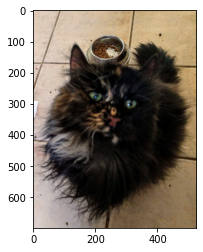

In [6]:
# The original image
mimi1 = Image.open('./img/mimi1.jpg')
imshow(mimi1)

(224, 224)


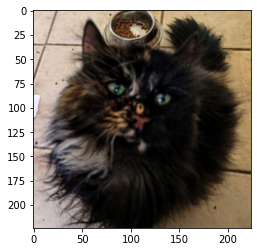

In [7]:
# We crop the image to center and resize it to 224 x 224
mimi1c = mimi1.crop((0, 87, 526, 613))
mimi1r = mimi1c.resize((224, 224))
imshow(mimi1r)
print(mimi1r.size)

In [8]:
img1 = torch.unsqueeze(transforms.ToTensor()(mimi1r), 0)
pred1 = model(img1)
percents = torch.nn.functional.softmax(pred1, dim=1)[0] * 100
probs, indices = percents.topk(5)
print(probs)
print(indices)
print(list(map(categories.get_imagenet_category, indices.tolist())), "\n")

tensor([55.8194, 15.3467,  5.6351,  1.6586,  1.4480], grad_fn=<TopkBackward>)
tensor([283, 552, 896, 897, 892])
['Persian cat', 'feather boa, boa', 'washbasin, handbasin, washbowl, lavabo, wash-hand basin', 'washer, automatic washer, washing machine', 'wall clock'] 



Here, the classification is correct to cat though Mimi is not a Persian cat.

In [ ]:
#
mimi2 = Image.open('./img/mimi2.jpg')
imshow(mimi2)

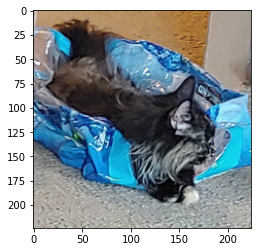

In [10]:
# Show the image with resizing and center crop
resizecrop_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224)])
imshow(resizecrop_transform(mimi2))

In [11]:
# Do the transform by torchvision and covert it to a tensor
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225])])

img = transform(mimi2)
img = torch.unsqueeze(img, 0)
pred = model(img)

In [12]:
#List the output
print(pred.size())
percents = torch.nn.functional.softmax(pred, dim=1)[0] * 100
probs, indices = percents.topk(5)
print(probs)
print(indices)
print(list(map(categories.get_imagenet_category, indices.tolist())), "\n")

torch.Size([1, 1000])
tensor([62.7928, 18.3971,  2.7773,  1.0935,  0.9992], grad_fn=<TopkBackward>)
tensor([797, 728, 196, 198, 281])
['sleeping bag', 'plastic bag', 'miniature schnauzer', 'standard schnauzer', 'tabby, tabby cat'] 



There is a plastic bag and cat in the top five choices.

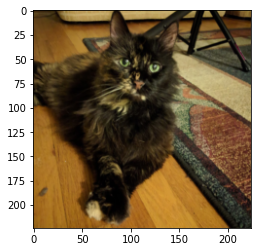

In [13]:
mimi3 = Image.open('./img/mimi3.jpg')
imshow(resizecrop_transform(mimi3))

In [14]:
img = transform(mimi3)
img = torch.unsqueeze(img, 0)
pred = model(img)

#List the output
print(pred.size())
percents = torch.nn.functional.softmax(pred, dim=1)[0] * 100
probs, indices = percents.topk(5)
print(probs)
print(indices)
print(list(map(categories.get_imagenet_category, indices.tolist())), "\n")

torch.Size([1, 1000])
tensor([41.2529, 23.7232,  4.6274,  4.4803,  3.6752], grad_fn=<TopkBackward>)
tensor([281, 283, 611, 282, 478])
['tabby, tabby cat', 'Persian cat', 'jigsaw puzzle', 'tiger cat', 'carton'] 



Mimi is very cat-like here.

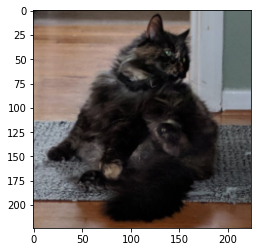

In [15]:
mimi4 = Image.open('./img/mimi4.jpg')
imshow(resizecrop_transform(mimi4))

In [16]:
img = transform(mimi4)
img = torch.unsqueeze(img, 0)
pred = model(img)

#List the output
print(pred.size())
percents = torch.nn.functional.softmax(pred, dim=1)[0] * 100
probs, indices = percents.topk(5)
print(probs)
print(indices)
print(list(map(categories.get_imagenet_category, indices.tolist())), "\n")

torch.Size([1, 1000])
tensor([33.0023, 16.7396, 11.9359, 11.7073,  3.4704], grad_fn=<TopkBackward>)
tensor([233, 224, 199, 256, 197])
['Bouvier des Flandres, Bouviers des Flandres', 'groenendael', 'Scotch terrier, Scottish terrier, Scottie', 'Newfoundland, Newfoundland dog', 'giant schnauzer'] 



Resenet knows there is fluffy stuff there.